In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# %tensorflow_version 2.x
# import tensorflow as tf
# print(tf.__version__)

In [9]:
import os
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
# os.environ["CUDA_VISIBLE_DEVICES"]="0"

import pandas as pd
import numpy as np
from matplotlib import pyplot
import scipy.misc 
from math import sqrt 
import itertools
from IPython.display import display
%matplotlib inline
import random

# %tensorflow_version 1.x
import tensorflow as tf

seed = 1213
np.random.seed(seed)
random.seed(seed)
# tf.random.set_random_seed(seed)
# tf.random.set_seed(seed)

from keras.utils import plot_model
import keras.backend as K
from keras.models import Model, Sequential
import keras.layers as layers
from keras.optimizers import Adam, SGD
from keras.regularizers import l1, l2
from sklearn.metrics import confusion_matrix
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator 
from sklearn.model_selection import train_test_split

# Data Class Weight
from sklearn.utils import class_weight
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard



def FER_Model(input_shape):
    # first input model
    visible = layers.Input(shape=input_shape, name='input')
    
    #             LSTM Version            #
    # net = layers.LSTM(10, return_sequences=False)(visible)
    net = layers.Dense(64, activation='relu')(visible)
    # net = layers.Dropout(0.2)(net)


    # net = layers.LSTM(5, return_sequences=True)(net)
    net = layers.Dense(32, activation='relu')(net)
    net = layers.Dropout(0.2)(net)

    # net = layers.LSTM(5, return_sequences=True)(visible)
    # net = layers.Dense(16, activation='relu')(net)
    # # net = layers.Dropout(0.2)(net)

    # net = layers.LSTM(1, return_sequences=False)(visible)
    # net = layers.Dense(8, activation='relu')(net)
    # net = layers.Dropout(0.5)(net)

    # net = layers.Conv2D(64, kernel_size=3, padding='same')(visible)
    # net = layers.Activation('relu')(net)
    # net = layers.LeakyReLU()(net)
    # net = layers.MaxPool2D(pool_size=2)(net)

    # shortcut_1 = net

    # net = layers.Conv2D(32, kernel_size=3, padding='same')(net)
    # net = layers.Activation('relu')(net)
    # net = layers.LeakyReLU()(net)
    # net = layers.MaxPool2D(pool_size=2)(net)

    # shortcut_2 = net

#     net = layers.Conv2D(256, kernel_size=3, padding='same')(net)
#     # net = layers.Activation('relu')(net)
#     net = layers.LeakyReLU()(net)
#     net = layers.MaxPool2D(pool_size=2)(net)

#     shortcut_3 = net

#     net = layers.Conv2D(128, kernel_size=1, padding='same')(net)
#     # net = layers.Activation('relu')(net)
#     net = layers.LeakyReLU()(net)
#     net = layers.MaxPool2D(pool_size=2)(net)

    net = layers.Flatten()(net)
    net = layers.Dense(64)(net)
    net = layers.LeakyReLU()(net)
    net = layers.Dense(num_classes, activation='softmax')(net)

    # create model 
    model = Model(inputs =visible, outputs = net)
    # summary layers
    print(model.summary())
    
    return model

# input_data_length = int(input('input_data_length : '))
input_data_length = 30
num_classes = 2

gdrive_path = '/content/gdrive/My Drive/Colab Notebooks/Project_Stock/'

model_range = range(472, 497) 
# break

for model_num in model_range:

  try:

    Made_X_ = np.load(gdrive_path + 'Made_X/Made_X 30_%s.npy' % model_num)
    Made_Y = np.load(gdrive_path + 'Made_X/Made_Y 30_%s.npy' % model_num).reshape(-1, 1)


    #         Feature Selection      #
    # Made_X = Made_X_[:, :, [-4]]
    Made_X = Made_X_[:, :, :4]

    Made_X = Made_X[-4000:]
    Made_Y = Made_Y[-4000:]
    # print(Made_X.shape)
    # print(Made_Y.shape)
    # break

    row = Made_X.shape[1]
    col = Made_X.shape[2]

    X_train, X_val, Y_train, Y_val = train_test_split(Made_X, Made_Y, test_size=0.3,
                                                        shuffle=False)

    print('X_train.shape :', X_train.shape)
    print('X_val.shape :', X_val.shape)


    label = Y_train.reshape(-1, )
    # print(label.shape)

    Y_train = np_utils.to_categorical(Y_train, num_classes)
    Y_val = np_utils.to_categorical(Y_val, num_classes)
    
    print('Y_train.shape :', Y_train.shape)
    print('Y_val.shape :', Y_val.shape)

    
    #         Get Class_Weights (--> should be considered only for TrainSet)       #
    class_weights = class_weight.compute_class_weight('balanced', 
                                                      classes=np.unique(label),
                                                      y=label)
    class_weights = dict(enumerate(class_weights))
    print(class_weights)
    # quit()

    batch_size = 35

    model = FER_Model((row, col))
    opt = Adam(lr=0.0001, decay=1e-6)

    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
      
        
    filepath = gdrive_path + "model/rapid_ascending %s_futures_rnn.hdf5" % model_num
    checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
    checkpoint2 = TensorBoard(log_dir='Tensorboard_graph',
                              histogram_freq=0,
                              write_graph=True,
                              write_images=True)
    checkpoint3 = EarlyStopping(monitor='val_accuracy', patience=100)
    callbacks_list = [checkpoint, checkpoint2, checkpoint3]

    # keras.callbacks.Callback 로 부터 log 를 받아와 history log 를 작성할 수 있다.

    # we iterate 200 times over the entire training set
    num_epochs = 1000
    history = model.fit(X_train, Y_train,
                        steps_per_epoch=int(len(X_train) / batch_size), 
                        epochs=num_epochs,  
                        verbose=2,  
                        callbacks=callbacks_list,
                        class_weight=class_weights,
                        validation_data=(X_val, Y_val),  
                        validation_steps=int(len(X_val) / batch_size),
                        shuffle=False)
    
  except Exception as e:
    print('Error occured :', e)


Streaming output truncated to the last 5000 lines.
Epoch 00006: val_accuracy improved from 0.76167 to 0.78750, saving model to /content/gdrive/My Drive/Colab Notebooks/Project_Stock/model/rapid_ascending 486_futures_rnn.hdf5
80/80 - 0s - loss: 0.6991 - accuracy: 0.5754 - val_loss: 0.6883 - val_accuracy: 0.7875
Epoch 7/1000

Epoch 00007: val_accuracy did not improve from 0.78750
80/80 - 0s - loss: 0.7010 - accuracy: 0.5671 - val_loss: 0.6879 - val_accuracy: 0.7767
Epoch 8/1000

Epoch 00008: val_accuracy did not improve from 0.78750
80/80 - 0s - loss: 0.7003 - accuracy: 0.5739 - val_loss: 0.6870 - val_accuracy: 0.7608
Epoch 9/1000

Epoch 00009: val_accuracy did not improve from 0.78750
80/80 - 0s - loss: 0.6971 - accuracy: 0.5789 - val_loss: 0.6851 - val_accuracy: 0.7675
Epoch 10/1000

Epoch 00010: val_accuracy did not improve from 0.78750
80/80 - 0s - loss: 0.6964 - accuracy: 0.5936 - val_loss: 0.6843 - val_accuracy: 0.7617
Epoch 11/1000

Epoch 00011: val_accuracy did not improve from 0

### ***Backtest***

Made_X.shape : (4000, 30, 4)
Made_Y.shape : (4000, 1)
Made_X_test.shape : (2701, 30, 4)
Made_Z_test.shape : (2701, 4)
X_train.shape : (2800, 30, 4)
X_val.shape : (1200, 30, 4)
model_num : 472
Pred by Real
80/80 [==============================] - 0s 2ms/step - loss: 0.6567 - accuracy: 0.7343


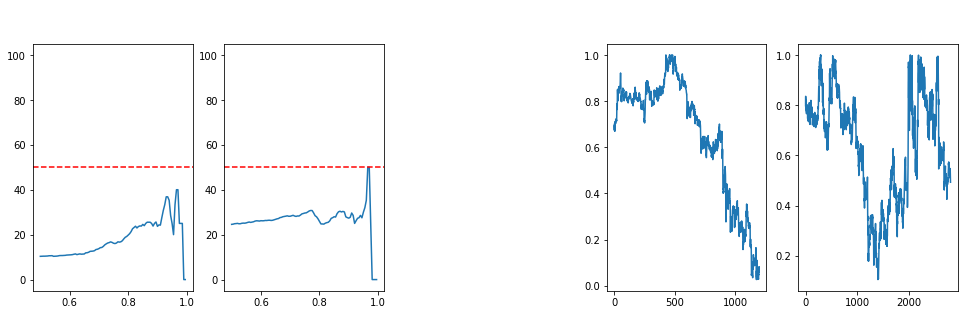


Made_X.shape : (4000, 30, 4)
Made_Y.shape : (4000, 1)
Made_X_test.shape : (2701, 30, 4)
Made_Z_test.shape : (2701, 4)
X_train.shape : (2800, 30, 4)
X_val.shape : (1200, 30, 4)
model_num : 473
Pred by Real
80/80 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.8214


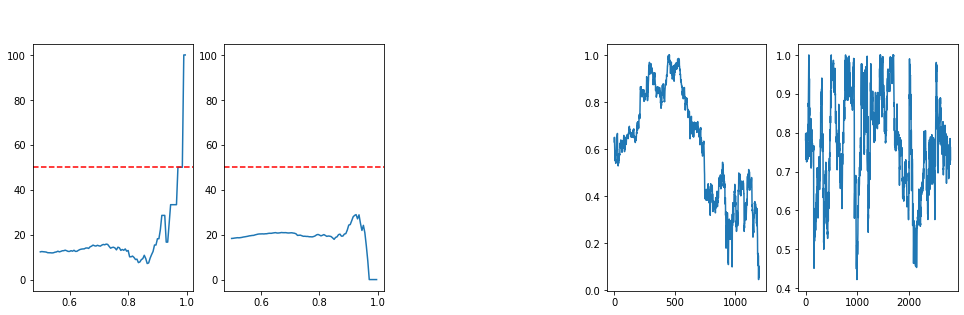


Made_X.shape : (4000, 30, 4)
Made_Y.shape : (4000, 1)
Made_X_test.shape : (2701, 30, 4)
Made_Z_test.shape : (2701, 4)
X_train.shape : (2800, 30, 4)
X_val.shape : (1200, 30, 4)
model_num : 474
Pred by Real
80/80 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.7811


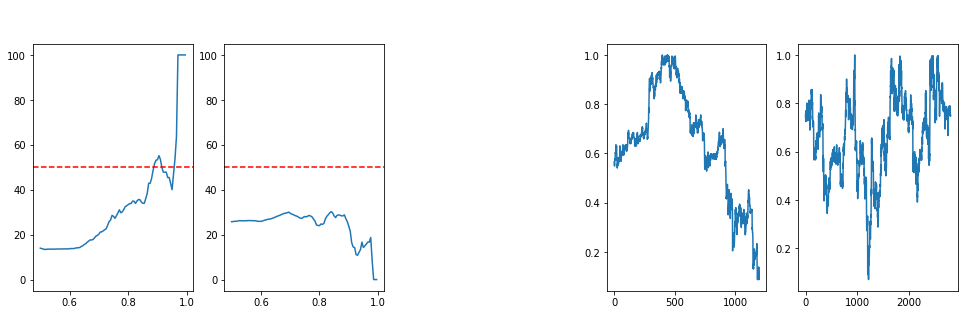


Made_X.shape : (4000, 30, 4)
Made_Y.shape : (4000, 1)
Made_X_test.shape : (2701, 30, 4)
Made_Z_test.shape : (2701, 4)
X_train.shape : (2800, 30, 4)
X_val.shape : (1200, 30, 4)
model_num : 475
Pred by Real
80/80 [==============================] - 0s 2ms/step - loss: 0.6640 - accuracy: 0.8214


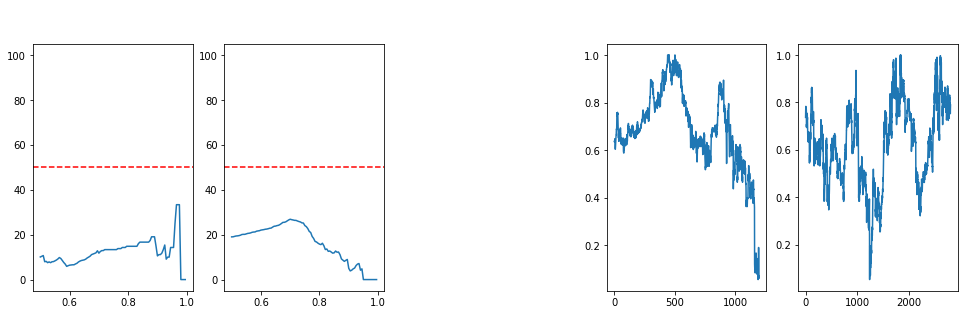


Made_X.shape : (4000, 30, 4)
Made_Y.shape : (4000, 1)
Made_X_test.shape : (2701, 30, 4)
Made_Z_test.shape : (2701, 4)
X_train.shape : (2800, 30, 4)
X_val.shape : (1200, 30, 4)
model_num : 476
Pred by Real
80/80 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.7346


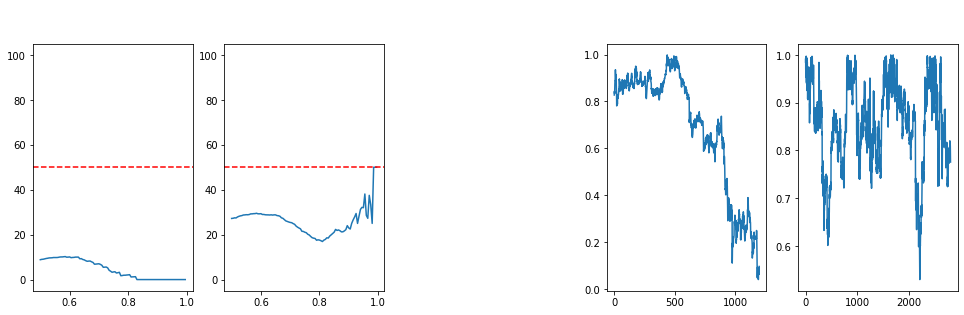


Made_X.shape : (4000, 30, 4)
Made_Y.shape : (4000, 1)
Made_X_test.shape : (2701, 30, 4)
Made_Z_test.shape : (2701, 4)
X_train.shape : (2800, 30, 4)
X_val.shape : (1200, 30, 4)
model_num : 477
Pred by Real
80/80 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.7475


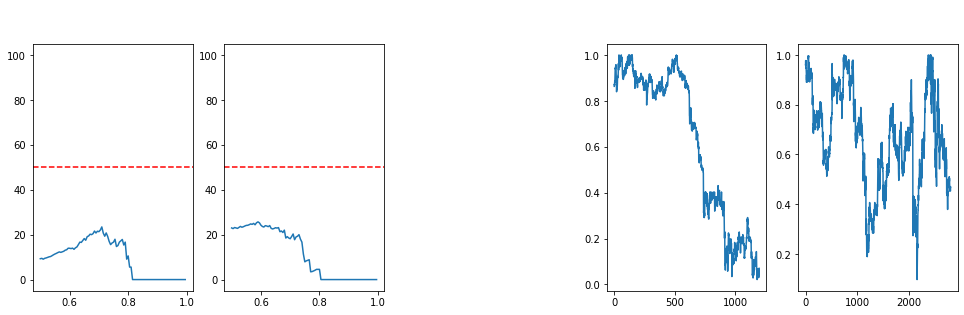


Made_X.shape : (4000, 30, 4)
Made_Y.shape : (4000, 1)
Made_X_test.shape : (2701, 30, 4)
Made_Z_test.shape : (2701, 4)
X_train.shape : (2800, 30, 4)
X_val.shape : (1200, 30, 4)
model_num : 478
Pred by Real
80/80 [==============================] - 0s 2ms/step - loss: 0.6709 - accuracy: 0.7204


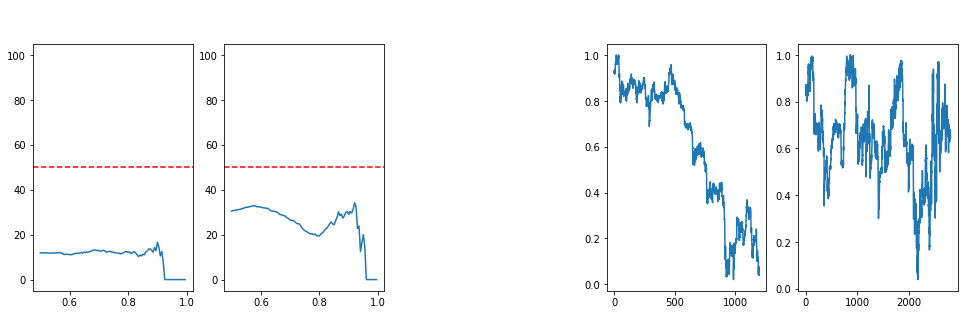


Made_X.shape : (4000, 30, 4)
Made_Y.shape : (4000, 1)
Made_X_test.shape : (2701, 30, 4)
Made_Z_test.shape : (2701, 4)
X_train.shape : (2800, 30, 4)
X_val.shape : (1200, 30, 4)
model_num : 479
Pred by Real
80/80 [==============================] - 0s 2ms/step - loss: 0.6521 - accuracy: 0.7929


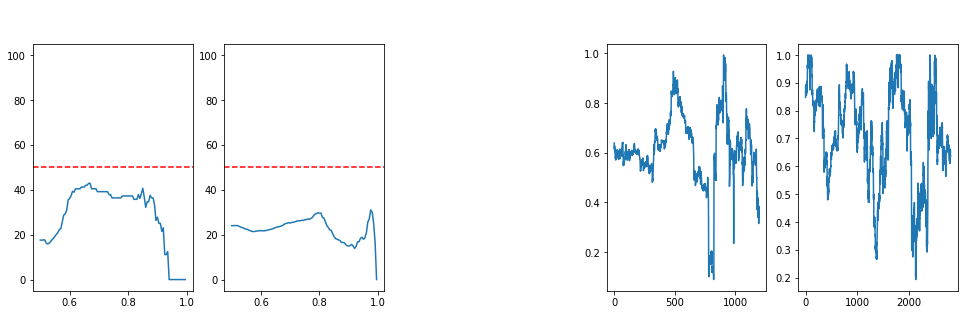


Made_X.shape : (4000, 30, 4)
Made_Y.shape : (4000, 1)
Made_X_test.shape : (2701, 30, 4)
Made_Z_test.shape : (2701, 4)
X_train.shape : (2800, 30, 4)
X_val.shape : (1200, 30, 4)
model_num : 480
Pred by Real
80/80 [==============================] - 0s 2ms/step - loss: 0.6783 - accuracy: 0.6146


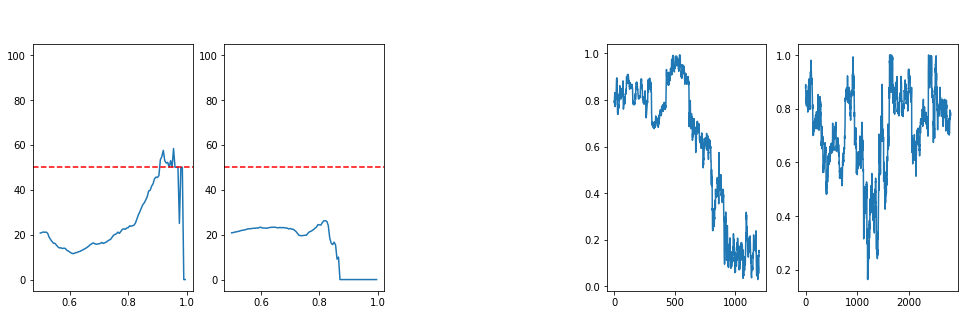


Made_X.shape : (4000, 30, 4)
Made_Y.shape : (4000, 1)
Made_X_test.shape : (2701, 30, 4)
Made_Z_test.shape : (2701, 4)
X_train.shape : (2800, 30, 4)
X_val.shape : (1200, 30, 4)
model_num : 481
Pred by Real
80/80 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.7939


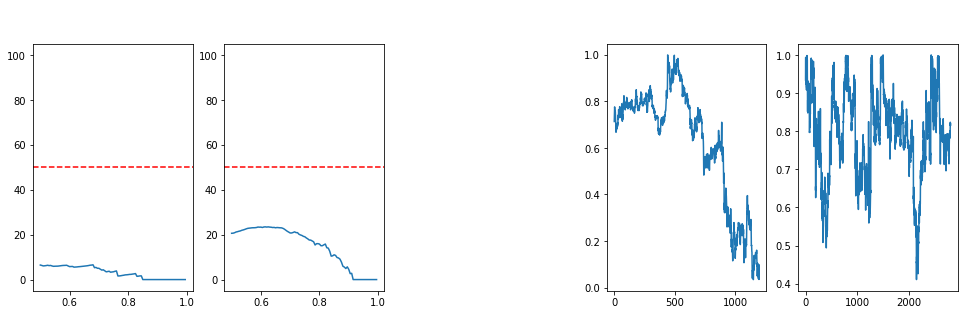


Made_X.shape : (4000, 30, 4)
Made_Y.shape : (4000, 1)
Made_X_test.shape : (2701, 30, 4)
Made_Z_test.shape : (2701, 4)
X_train.shape : (2800, 30, 4)
X_val.shape : (1200, 30, 4)
model_num : 482
Pred by Real
80/80 [==============================] - 0s 2ms/step - loss: 0.5487 - accuracy: 0.7286


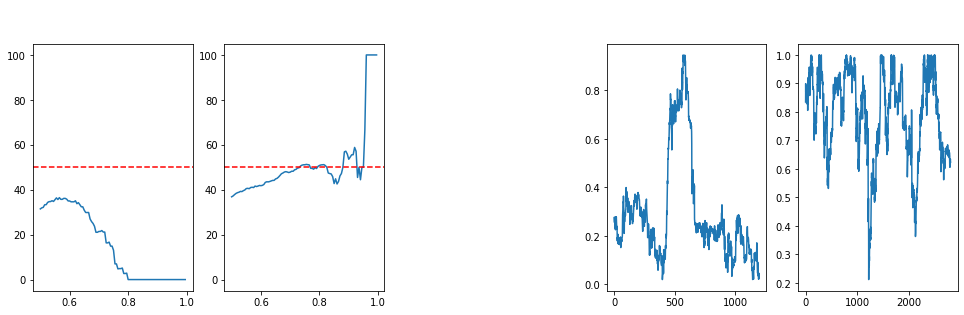


Made_X.shape : (4000, 30, 4)
Made_Y.shape : (4000, 1)
Made_X_test.shape : (2701, 30, 4)
Made_Z_test.shape : (2701, 4)
X_train.shape : (2800, 30, 4)
X_val.shape : (1200, 30, 4)
model_num : 483
Pred by Real
80/80 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.7329


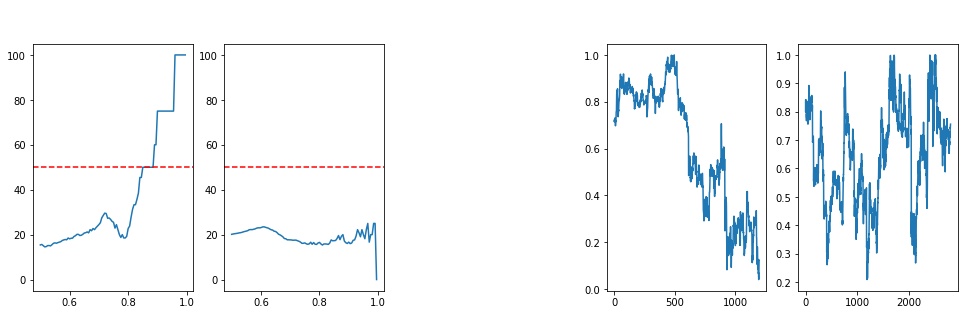


Made_X.shape : (4000, 30, 4)
Made_Y.shape : (4000, 1)
Made_X_test.shape : (2701, 30, 4)
Made_Z_test.shape : (2701, 4)
X_train.shape : (2800, 30, 4)
X_val.shape : (1200, 30, 4)
model_num : 484
Pred by Real
80/80 [==============================] - 0s 2ms/step - loss: 0.5932 - accuracy: 0.8239


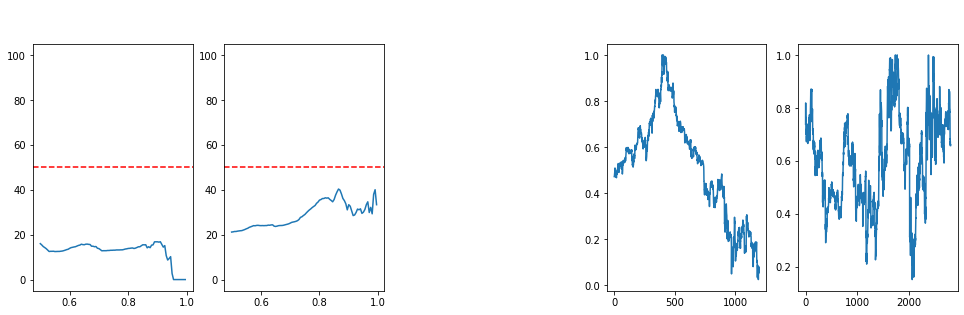


Made_X.shape : (4000, 30, 4)
Made_Y.shape : (4000, 1)
Made_X_test.shape : (2701, 30, 4)
Made_Z_test.shape : (2701, 4)
X_train.shape : (2800, 30, 4)
X_val.shape : (1200, 30, 4)
model_num : 485
Pred by Real
80/80 [==============================] - 0s 2ms/step - loss: 0.6519 - accuracy: 0.7957


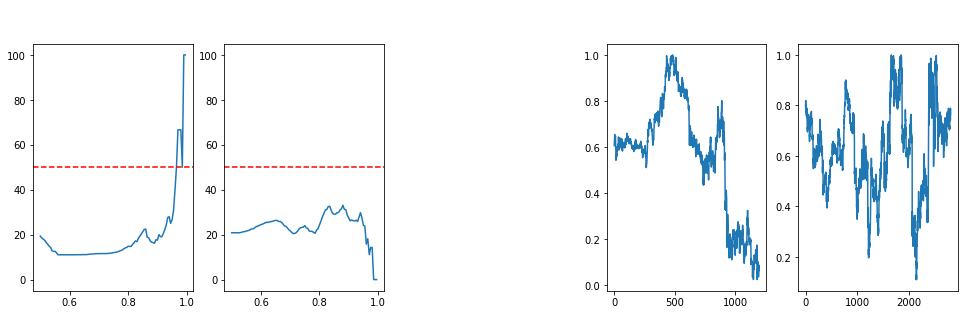


Made_X.shape : (4000, 30, 4)
Made_Y.shape : (4000, 1)
Made_X_test.shape : (2701, 30, 4)
Made_Z_test.shape : (2701, 4)
X_train.shape : (2800, 30, 4)
X_val.shape : (1200, 30, 4)
model_num : 486
Pred by Real
80/80 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.7100


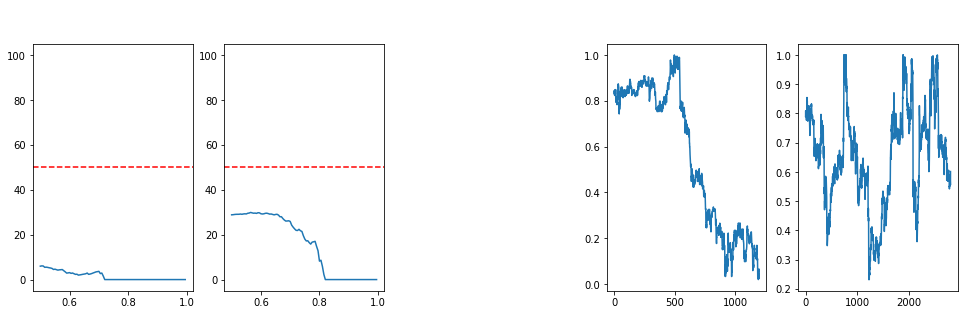


Made_X.shape : (4000, 30, 4)
Made_Y.shape : (4000, 1)
Made_X_test.shape : (2701, 30, 4)
Made_Z_test.shape : (2701, 4)
X_train.shape : (2800, 30, 4)
X_val.shape : (1200, 30, 4)
model_num : 487
Pred by Real
80/80 [==============================] - 0s 2ms/step - loss: 0.6838 - accuracy: 0.6650


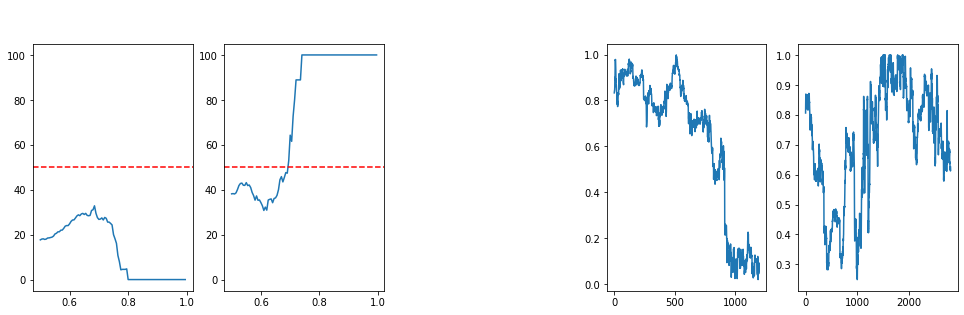


Made_X.shape : (4000, 30, 4)
Made_Y.shape : (4000, 1)
Made_X_test.shape : (2701, 30, 4)
Made_Z_test.shape : (2701, 4)
X_train.shape : (2800, 30, 4)
X_val.shape : (1200, 30, 4)
model_num : 488
Pred by Real
80/80 [==============================] - 0s 2ms/step - loss: 0.6555 - accuracy: 0.7857


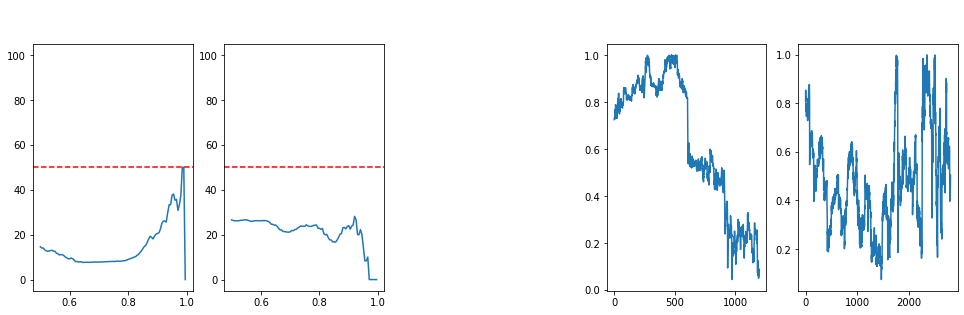


Made_X.shape : (4000, 30, 4)
Made_Y.shape : (4000, 1)
Made_X_test.shape : (2701, 30, 4)
Made_Z_test.shape : (2701, 4)
X_train.shape : (2800, 30, 4)
X_val.shape : (1200, 30, 4)
model_num : 489
Pred by Real
80/80 [==============================] - 0s 2ms/step - loss: 0.6480 - accuracy: 0.6271


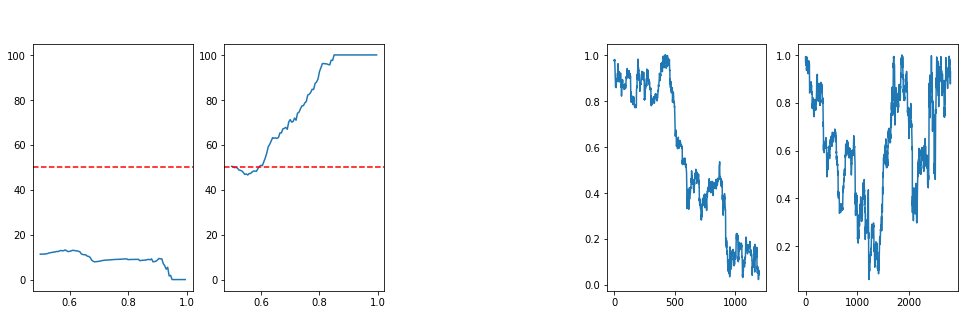


Made_X.shape : (4000, 30, 4)
Made_Y.shape : (4000, 1)
Made_X_test.shape : (2701, 30, 4)
Made_Z_test.shape : (2701, 4)
X_train.shape : (2800, 30, 4)
X_val.shape : (1200, 30, 4)
model_num : 490
Pred by Real
80/80 [==============================] - 0s 2ms/step - loss: 0.6583 - accuracy: 0.7418


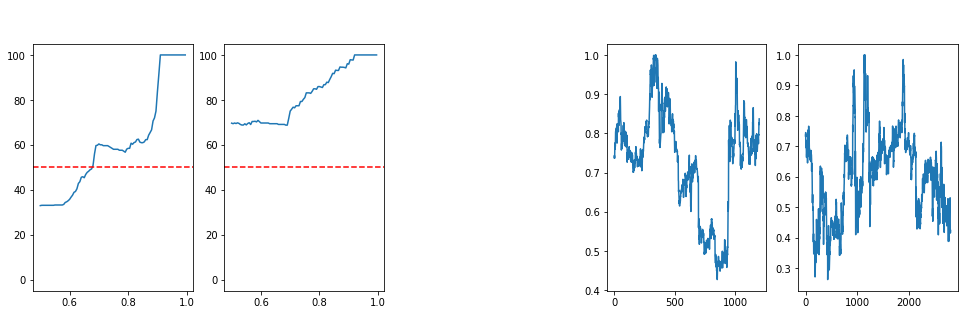


Made_X.shape : (4000, 30, 4)
Made_Y.shape : (4000, 1)
Made_X_test.shape : (2701, 30, 4)
Made_Z_test.shape : (2701, 4)
X_train.shape : (2800, 30, 4)
X_val.shape : (1200, 30, 4)
model_num : 491
Pred by Real
80/80 [==============================] - 0s 2ms/step - loss: 0.6732 - accuracy: 0.7371


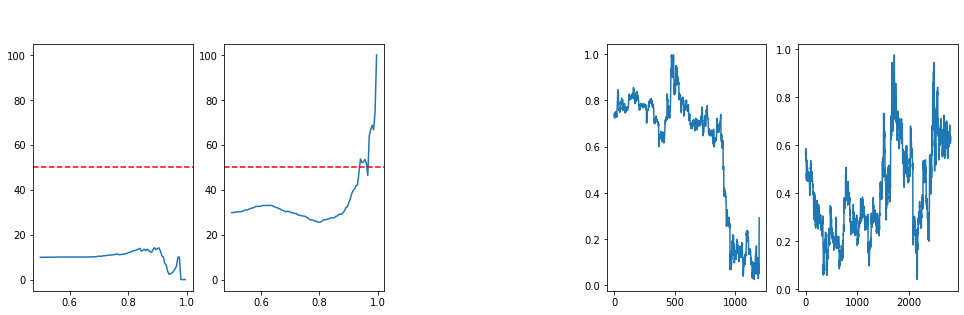


Made_X.shape : (4000, 30, 4)
Made_Y.shape : (4000, 1)
Made_X_test.shape : (2701, 30, 4)
Made_Z_test.shape : (2701, 4)
X_train.shape : (2800, 30, 4)
X_val.shape : (1200, 30, 4)
model_num : 492
Pred by Real
80/80 [==============================] - 0s 2ms/step - loss: 0.6691 - accuracy: 0.6614


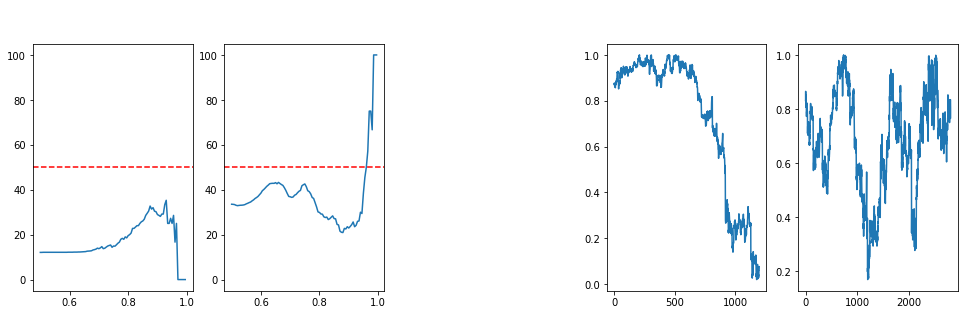


Made_X.shape : (4000, 30, 4)
Made_Y.shape : (4000, 1)
Made_X_test.shape : (2701, 30, 4)
Made_Z_test.shape : (2701, 4)
X_train.shape : (2800, 30, 4)
X_val.shape : (1200, 30, 4)
model_num : 493
Pred by Real
80/80 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.6600


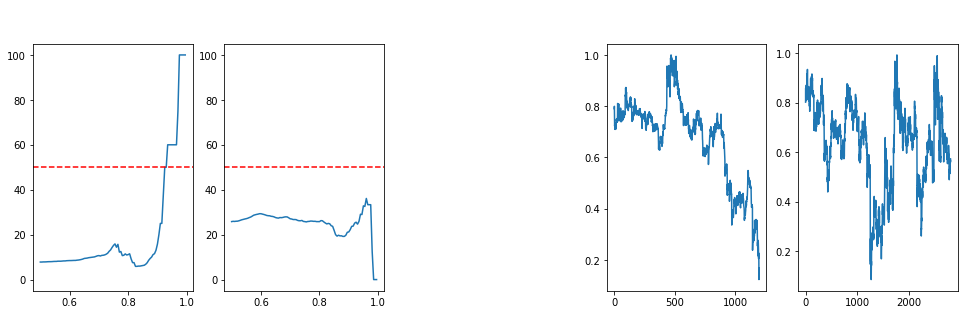


Made_X.shape : (4000, 30, 4)
Made_Y.shape : (4000, 1)
Made_X_test.shape : (2701, 30, 4)
Made_Z_test.shape : (2701, 4)
X_train.shape : (2800, 30, 4)
X_val.shape : (1200, 30, 4)
model_num : 494
Pred by Real
80/80 [==============================] - 0s 2ms/step - loss: 0.6587 - accuracy: 0.8036


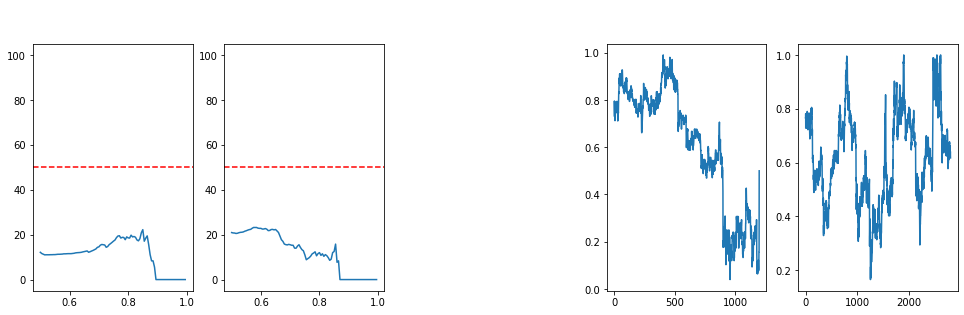


Made_X.shape : (4000, 30, 4)
Made_Y.shape : (4000, 1)
Made_X_test.shape : (2701, 30, 4)
Made_Z_test.shape : (2701, 4)
X_train.shape : (2800, 30, 4)
X_val.shape : (1200, 30, 4)
model_num : 495
Pred by Real
80/80 [==============================] - 0s 2ms/step - loss: 0.6701 - accuracy: 0.7679


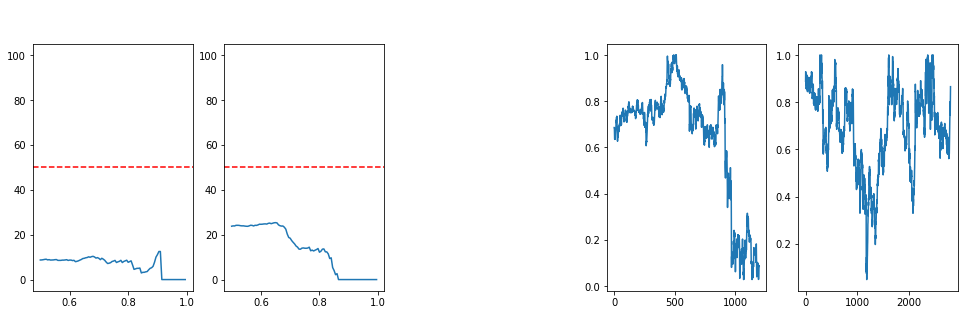


Made_X.shape : (4000, 30, 4)
Made_Y.shape : (4000, 1)
Made_X_test.shape : (2701, 30, 4)
Made_Z_test.shape : (2701, 4)
X_train.shape : (2800, 30, 4)
X_val.shape : (1200, 30, 4)
model_num : 496
Pred by Real
80/80 [==============================] - 0s 2ms/step - loss: 0.6462 - accuracy: 0.7329


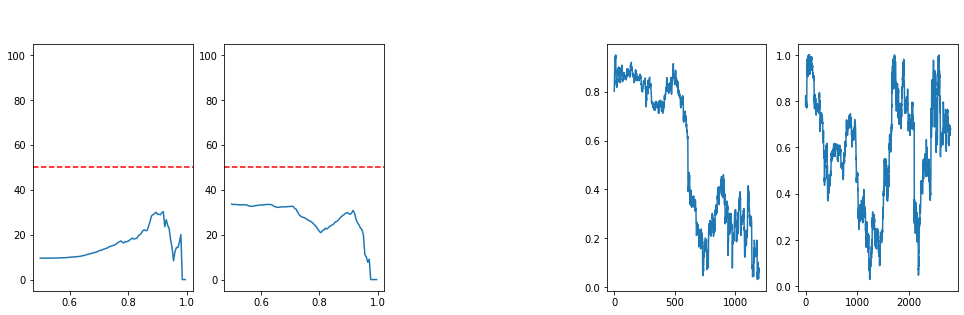

In [10]:
#     Confidence value should be adjusted by min max scale in y_pred    #
from keras.models import load_model
import matplotlib.pyplot as plt


trade_on = True
show_trade_data = False

test_model_range = range(667, 701)
for model_num, test_model_num in zip(model_range, test_model_range):

  try:
    Made_X_ = np.load(gdrive_path + 'Made_X/Made_X 30_%s.npy' % model_num)
    Made_Y = np.load(gdrive_path + 'Made_X/Made_Y 30_%s.npy' % model_num).reshape(-1, 1)

    Made_X_test_ = np.load(gdrive_path + 'Made_X/Made_X %s_%s.npy' % (input_data_length, test_model_num))
    #     for trade, ohlc data    #
    Made_Z_test = np.load(gdrive_path + 'Made_X/Made_Z %s_%s.npy' % (input_data_length, test_model_num))

    # Made_X2 = np.load(gdrive_path + 'Made_X/Made_X %s_%s.npy' % (30, 219))
    # Made_Y2 = np.load(gdrive_path + 'Made_X/Made_Y %s_%s.npy' % (30, 219))

    #         Feature Selection      #
    # Made_X = Made_X_[:, :, [-4]]
    # Made_X = Made_X_[:, :, :4]
    Made_X = Made_X_[:, :, :4]
    # Made_X2 = Made_X2[:, :, [0, 2, 3, 1]]


    #         Train Limit         #
    Made_X = Made_X[-4000:]
    Made_Y = Made_Y[-4000:]
    Made_X_test = Made_X_test_[:, :, :4]
    print('Made_X.shape :', Made_X.shape)
    print('Made_Y.shape :', Made_Y.shape)
    print('Made_X_test.shape :', Made_X_test.shape)
    print('Made_Z_test.shape :', Made_Z_test.shape)

    # print('min(Made_Z_test) :', np.min(Made_Z_test))
    # print(sum(sum(Made_X != Made_X2)))
    # break

    row = Made_X.shape[1]
    col = Made_X.shape[2]

    X_train, X_val, Y_train, Y_val = train_test_split(Made_X, Made_Y, test_size=0.3,
                                                        shuffle=False)
    X_train = X_train.astype('float32')#.reshape(-1, input_data_length, col, 1)
    X_val = X_val.astype('float32')#.reshape(-1, input_data_length, col, 1)

    Y_train = Y_train.astype('float32')
    Y_val = Y_val.astype('float32')
    
    X_test = Made_X_test

    Y_train = np_utils.to_categorical(Y_train, num_classes)
    Y_val = np_utils.to_categorical(Y_val, num_classes)
    
    print('X_train.shape :', X_train.shape)
    print('X_val.shape :', X_val.shape)

      
    for model_i, model_num in enumerate([model_num]):

      print('model_num :', model_num)
      if model_i == 0:
        print('Pred by Real')
      else:
        print('Pred by None Real')

      model_path = gdrive_path + "model/rapid_ascending %s_futures_rnn.hdf5" % model_num
      model = load_model(model_path)

      #     val, train -> confidence 와 evaluate 용
      val_y_pred_ = model.predict(X_val, verbose=1)
      train_y_pred_ = model.predict(X_train, verbose=1)

      #     test -> profit 용
      test_y_pred_ = model.predict(X_test, verbose=1)

      plt.figure(figsize=(20, 10))
      
      for index, y_pred_ in enumerate([val_y_pred_, train_y_pred_]):

        # print('len(y_pred_) :', len(y_pred_))
        target_column = y_pred_[:, [-1]]
        # column_min, column_max = train_y_pred_.min(),train_y_pred_.max()
        column_min, column_max = min(target_column),max(target_column)
        # print(column_min, column_max)

        if index == 0:
          _, model_acc = model.evaluate(X_val, Y_val, batch_size=batch_size)
        elif index == 1:
          _, model_acc = model.evaluate(X_train, Y_train, batch_size=batch_size)

        x_ticks = np.arange(0.5, 1, 0.005)
        # x_ticks = [0.6]

        confidence_result = list()
        profit_result = list()        
        for confidence in x_ticks:
          # confidence = 0.9

          # if column_max < 0.5:
          #   break
          # else:
          #   scaled_confidence = .5 + (column_max - .5) * confidence
          scaled_confidence = column_min + (column_max - column_min) * confidence
          # scaled_confidence = confidence

          # print(scaled_confidence)
          # print('confidence :', confidence)

          y_pred = np.where(target_column >= scaled_confidence, 1, 0).reshape(-1, )

          #     결국, Categorical 은 index 값으로 value 를 나타내는 것    #
          # t_te = np.argmax(Y_test, axis=1)            
          if index == 0:
            t_te = np.argmax(Y_val, axis=1)
          elif index == 1:
            t_te = np.argmax(Y_train, axis=1)

          # t_te = Y_test

          #       Trading Session, Accumulate Profit     #
          elif index == 2:

            accumulated_profit = 1.

            if trade_on:
              tp_ratio = 3
              target_percentage = 0.05
              sl_least_gap_ratio = 0.05

              long_marker_x = list()
              long_marker_y = list()
              tp_marker_x = list()
              tp_marker_y = list()
              sl_marker_x = list()
              sl_marker_y = list()
              tp_level_list_x = list()
              tp_level_list_y = list()
              sl_level_list_x = list()
              sl_level_list_y = list()

              #         This column order should be changed     #
              high, low, close = np.split(Made_Z_test[:, 1:4], 3, axis=1) # <-- Column Order should be changed
              # break
              i = input_data_length
              while (i < len(y_pred)):

                #     Long    #
                if y_pred[i] == 1:  

                  long_sl = np.min(low[i + 1 -input_data_length:i + 1])
                  short_sl = np.max(high[i + 1 -input_data_length:i + 1])
                  tp_level = (close[i] - long_sl) * tp_ratio + close[i]

                  #       Consider 'sl_least_gap'     #
                  if not close[i] >= long_sl + (short_sl - long_sl) * sl_least_gap_ratio:
                    i += 1
                    if i >= len(y_pred):
                      break
                    continue

                  if show_trade_data: print(i, 'long')

                  long_marker_x.append(i)
                  long_marker_y.append(close[i])

                  if i + 1 >= len(y_pred):
                    break
                  
                  for j in range(i + 1, len(y_pred)):

                    if show_trade_data: print(long_sl, low[j], high[j], tp_level)
                    tp_level_list_x.append(j)
                    tp_level_list_y.append(tp_level)

                    if high[j] > tp_level:
                      accumulated_profit *= 1 + target_percentage * tp_ratio
                      if show_trade_data: print(j, 'tp, accum.profit :', accumulated_profit)  
                      tp_marker_x.append(j)
                      tp_marker_y.append(high[j])     
                      break
                    
                    elif low[j] < long_sl:
                      accumulated_profit *= 1 - target_percentage
                      if show_trade_data: print(j, 'tp, accum.profit :', accumulated_profit)          
                      sl_marker_x.append(j)
                      sl_marker_y.append(low[j])
                      break

                  i = j

                i += 1
                # print('i, len(y_pred) :', i, len(y_pred))
                if i >= len(y_pred):
                  break

            profit_result.append(accumulated_profit)

            #              Show Entry Point       #
            # plt.figure(figsize=(20, 10))
            # plt.plot(close)
            # plt.plot(long_marker_x, long_marker_y, 'o', color='green')             
            # plt.plot(tp_marker_x, tp_marker_y, 'o', color='blue')
            # plt.plot(sl_marker_x, sl_marker_y, 'o', color='red')
            # plt.plot(tp_level_list_x, tp_level_list_y, '.', color='blue')
            # plt.title('Accumulated Profit : %.3f \n confidence : %.5f' % (accumulated_profit, scaled_confidence), 
            #           color='white', fontsize=15)
            # plt.show()

          if index != 2:

            pred_true, real_true, true_true = 0, 0, 0   

            for i in range(len(y_pred)):
              if y_pred[i] == 1:  
                pred_true += 1
                if t_te[i] == y_pred[i]:
                  real_true += 1

            if pred_true != 0:
              true_true = real_true / pred_true * 100
            confidence_result.append(true_true)

          # print('Real True / Pred True : %s / %s' % (real_true, pred_true))
          # print('Accuracy : %.2f %%' % (true_true))
          # print('Accumulated Profit : %.3f' % accumulated_profit)
          # print()

        #         Show True True Acc by confidence    #
        if index != 2:
          plt.subplot(2, 6, index + 1 + model_i * 6)
          plt.plot(x_ticks, confidence_result)
          plt.axhline(50, linestyle='--', color='red')
          plt.ylim(-5, 105)
          plt.title('%s %s \n Model Acc %s \n TT Acc' % (column_min, column_max, model_acc), color='white', fontsize=10)

        #       Show Profit by confidence     #
        else:
          plt.subplot(2, 6, index + 1 + model_i * 6)
          plt.plot(x_ticks, profit_result)
          plt.axhline(1., linestyle='--', color='red')
          plt.title('%s %s \n Test Profit \n %s %s' % (column_min, column_max, 
                                                        min(profit_result), max(profit_result)), color='white', fontsize=10)

        if index == 0:
          plt.subplot(2, 6, index + 4 + model_i * 6)
          plt.plot(Made_X_[-len(X_val):, [-1], [3]])
        elif index == 1:
          plt.subplot(2, 6, index + 4 + model_i * 6)
          plt.plot(Made_X_[:len(X_train), [-1], [3]])
        elif index == 2:
          plt.subplot(2, 6, index + 4 + model_i * 6)
          plt.plot(Made_Z_test[:, 3])
        
      plt.show()

  except Exception as e:
    print('Error occured : ', e)
  print()

  # break



### ***None Realtime vs Realtime***

Pred by Real
67/67 [==============================] - 0s 1ms/step
Pred by None Real
67/67 [==============================] - 0s 2ms/step


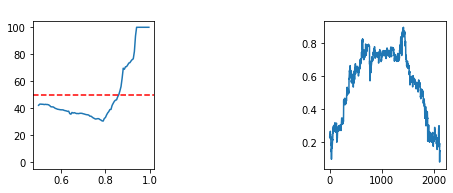

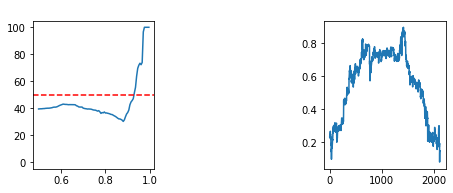


Pred by Real
65/65 [==============================] - 0s 951us/step
Pred by None Real
65/65 [==============================] - 0s 944us/step


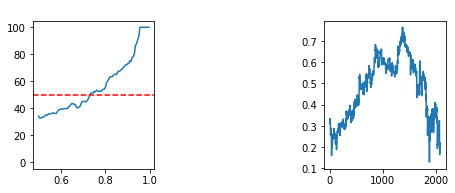

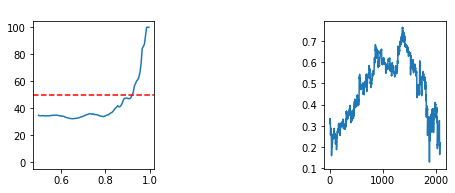


Pred by Real
65/65 [==============================] - 0s 2ms/step
Pred by None Real
65/65 [==============================] - 0s 1ms/step


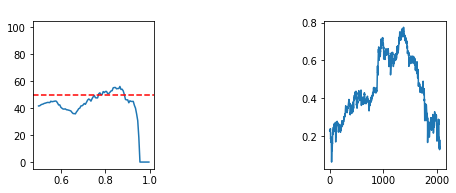

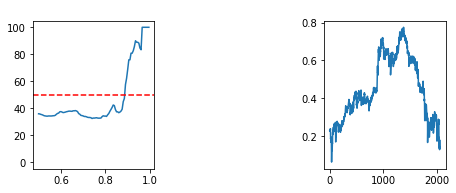


Pred by Real
67/67 [==============================] - 0s 2ms/step
Pred by None Real
67/67 [==============================] - 0s 1ms/step


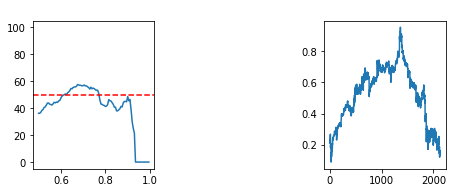

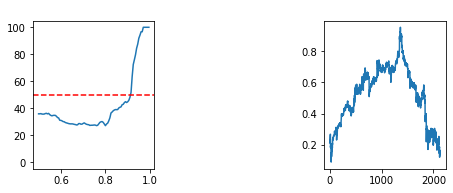


Pred by Real
66/66 [==============================] - 0s 1ms/step
Pred by None Real
66/66 [==============================] - 0s 1ms/step


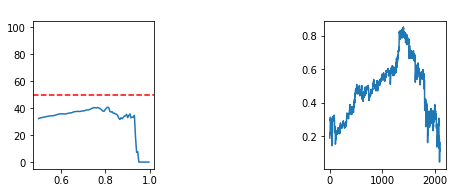

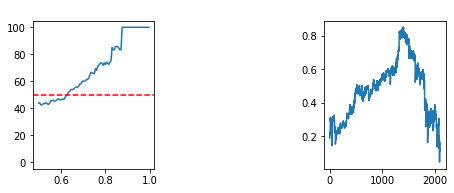


Pred by Real
68/68 [==============================] - 0s 2ms/step
Pred by None Real
68/68 [==============================] - 0s 2ms/step


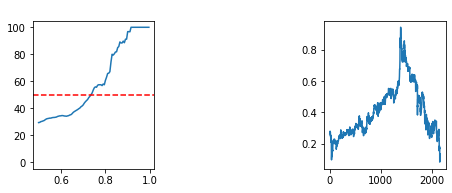

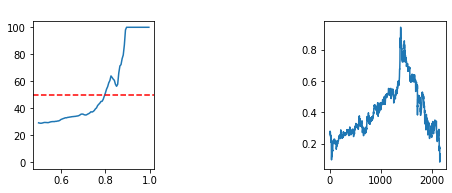


Pred by Real
66/66 [==============================] - 0s 1ms/step
Pred by None Real
66/66 [==============================] - 0s 1ms/step


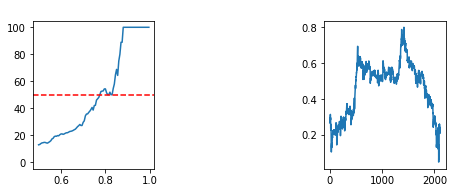

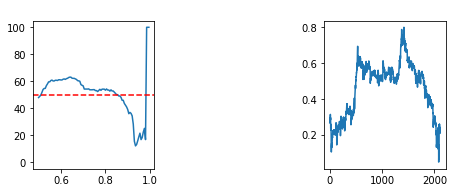


Pred by Real
66/66 [==============================] - 0s 1ms/step
Pred by None Real
66/66 [==============================] - 0s 1ms/step


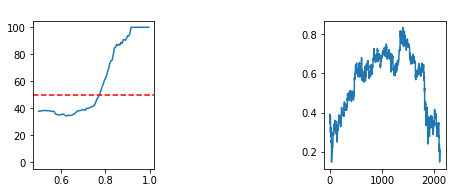

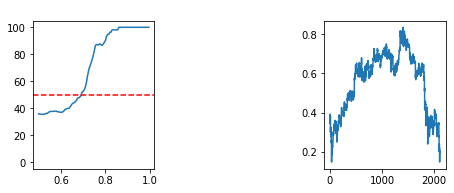


Pred by Real
Error occured :  SavedModel file does not exist at: /content/gdrive/My Drive/Colab Notebooks/Project_Stock/model/rapid_ascending 30_227_futures_rnn.hdf5/{saved_model.pbtxt|saved_model.pb}

Pred by Real
67/67 [==============================] - 0s 2ms/step
Pred by None Real
67/67 [==============================] - 0s 2ms/step


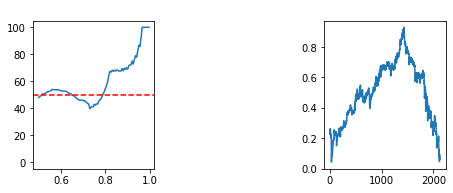

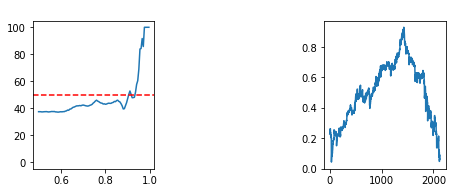


Pred by Real
66/66 [==============================] - 0s 2ms/step
Pred by None Real
66/66 [==============================] - 0s 1ms/step


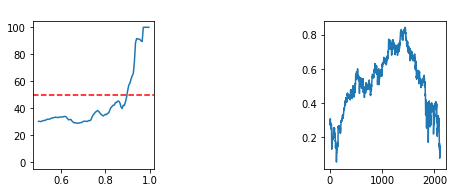

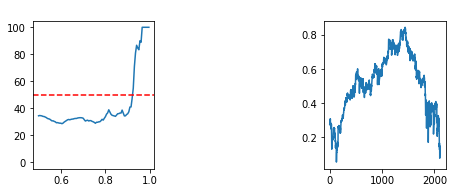


Pred by Real
66/66 [==============================] - 0s 1ms/step
Pred by None Real
66/66 [==============================] - 0s 1ms/step


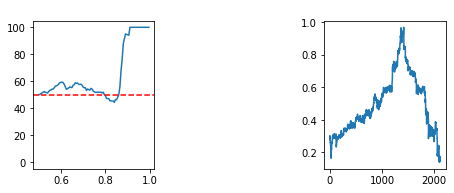

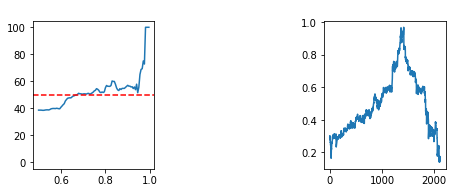


Pred by Real
65/65 [==============================] - 0s 2ms/step
Pred by None Real
65/65 [==============================] - 0s 1ms/step


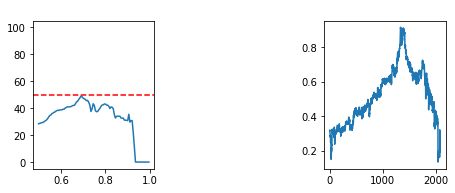

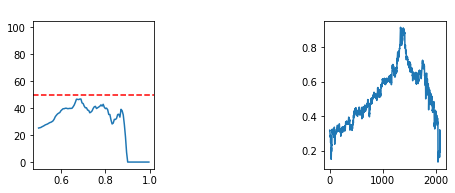


Pred by Real
66/66 [==============================] - 0s 1ms/step
Pred by None Real
66/66 [==============================] - 0s 1ms/step


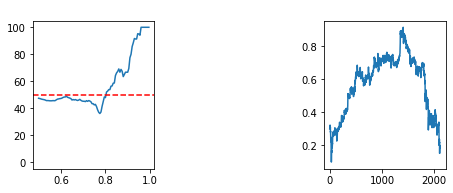

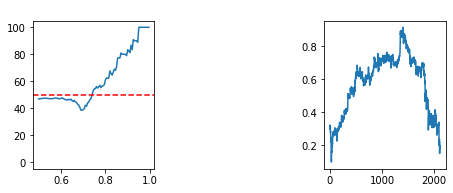


Pred by Real
66/66 [==============================] - 0s 1ms/step
Pred by None Real
66/66 [==============================] - 0s 2ms/step


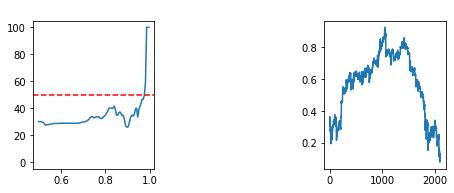

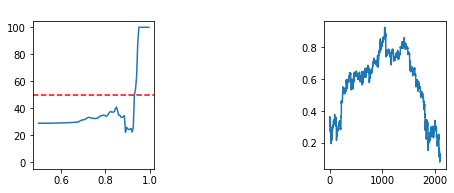


Pred by Real
67/67 [==============================] - 0s 1ms/step
Pred by None Real
67/67 [==============================] - 0s 1ms/step


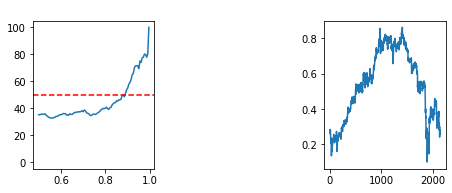

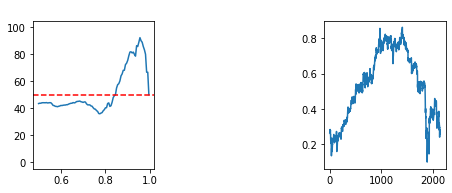


Pred by Real
64/64 [==============================] - 0s 2ms/step
Pred by None Real
64/64 [==============================] - 0s 1ms/step


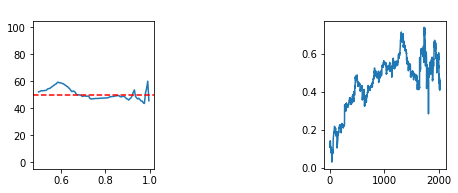

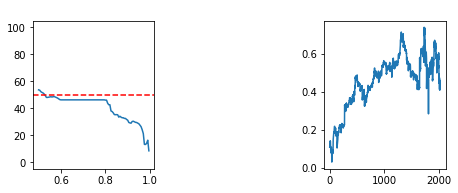


Pred by Real
63/63 [==============================] - 0s 1ms/step
Pred by None Real
63/63 [==============================] - 0s 2ms/step


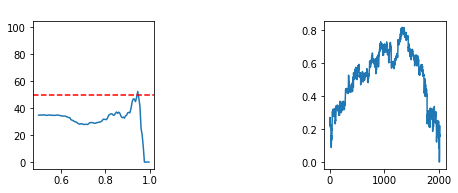

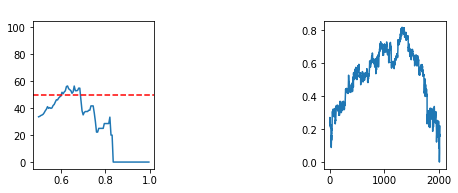


Pred by Real
66/66 [==============================] - 0s 1ms/step
Pred by None Real
66/66 [==============================] - 0s 2ms/step


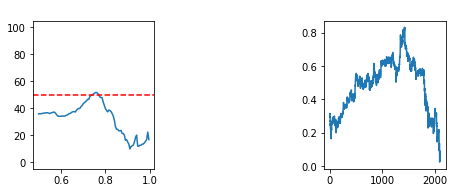

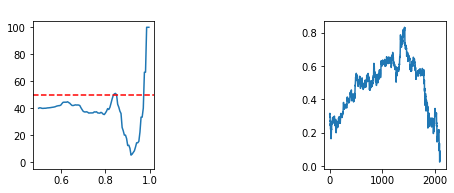


Pred by Real
63/63 [==============================] - 0s 1ms/step
Pred by None Real
63/63 [==============================] - 0s 1ms/step


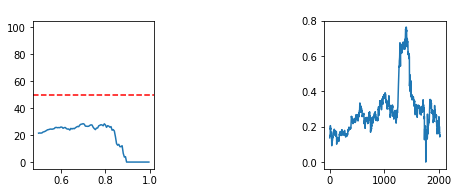

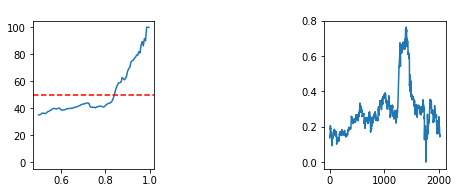


Pred by Real
64/64 [==============================] - 0s 1ms/step
Pred by None Real
64/64 [==============================] - 0s 1ms/step


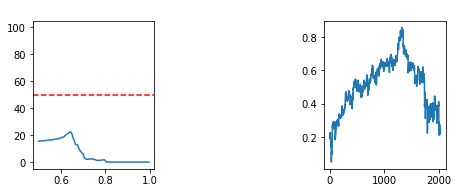

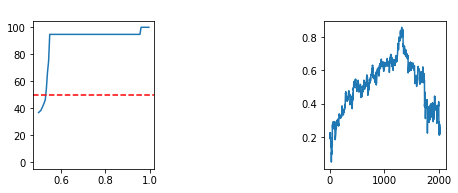


Pred by Real
67/67 [==============================] - 0s 1ms/step
Pred by None Real
67/67 [==============================] - 0s 1ms/step


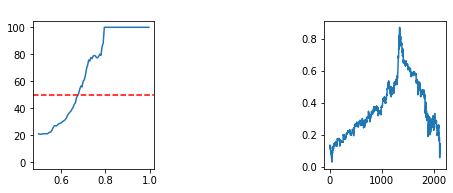

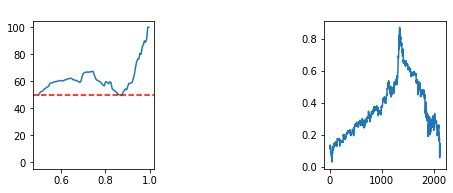


Pred by Real
65/65 [==============================] - 0s 1ms/step
Pred by None Real
65/65 [==============================] - 0s 2ms/step


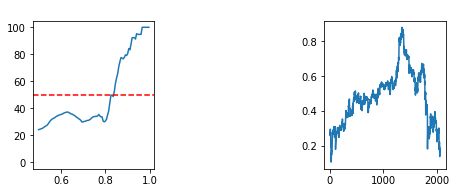

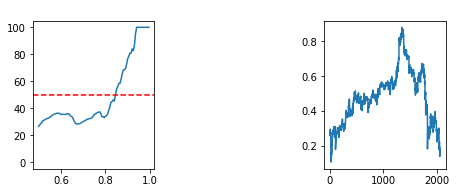


Pred by Real
66/66 [==============================] - 0s 1ms/step
Pred by None Real
66/66 [==============================] - 0s 1ms/step


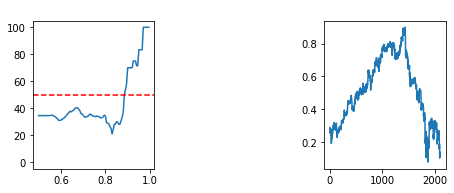

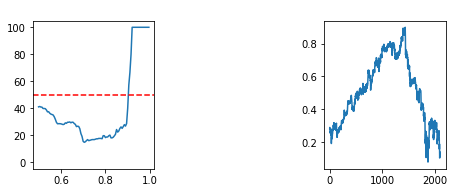


Pred by Real
67/67 [==============================] - 0s 1ms/step
Pred by None Real
67/67 [==============================] - 0s 1ms/step


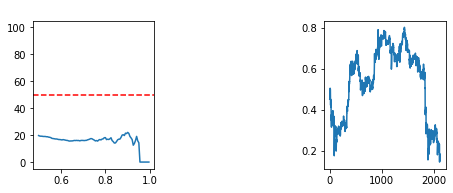

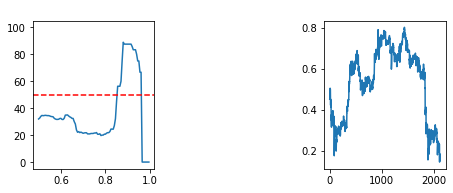


Pred by Real
69/69 [==============================] - 0s 1ms/step
Pred by None Real
69/69 [==============================] - 0s 1ms/step


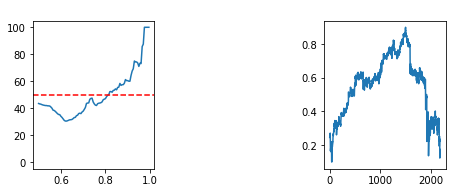

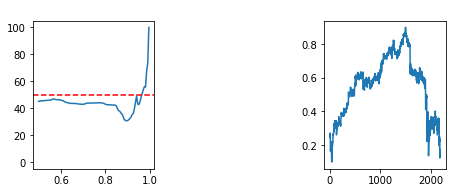


Pred by Real
66/66 [==============================] - 0s 1ms/step
Pred by None Real
66/66 [==============================] - 0s 1ms/step


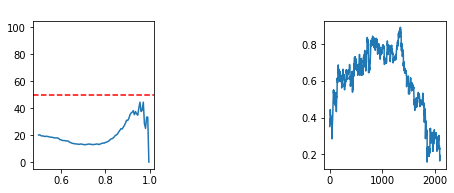

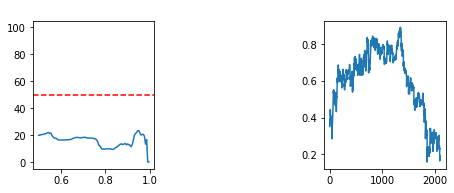


Pred by Real
66/66 [==============================] - 0s 1ms/step
Pred by None Real
66/66 [==============================] - 0s 2ms/step


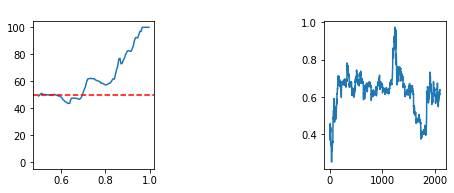

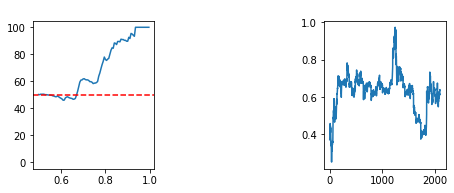


Pred by Real
66/66 [==============================] - 0s 1ms/step
Pred by None Real
66/66 [==============================] - 0s 1ms/step


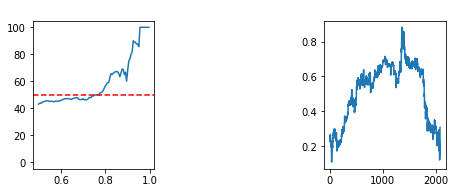

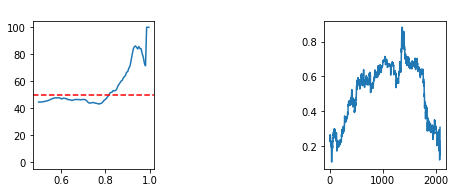


Pred by Real
66/66 [==============================] - 0s 1ms/step
Pred by None Real
66/66 [==============================] - 0s 1ms/step


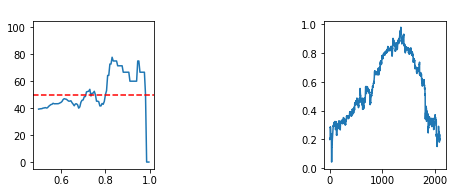

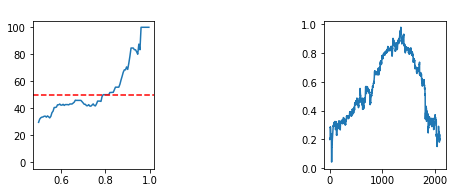


Pred by Real
68/68 [==============================] - 0s 2ms/step
Pred by None Real
68/68 [==============================] - 0s 1ms/step


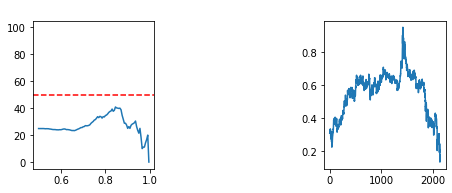

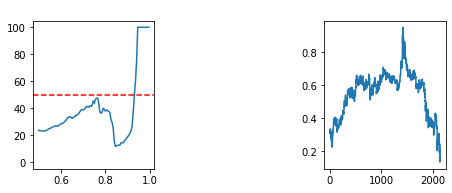


Pred by Real
67/67 [==============================] - 0s 1ms/step
Pred by None Real
67/67 [==============================] - 0s 1ms/step


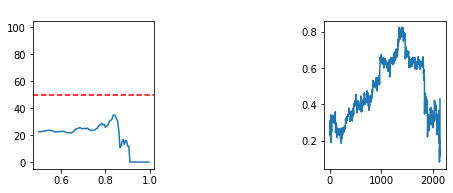

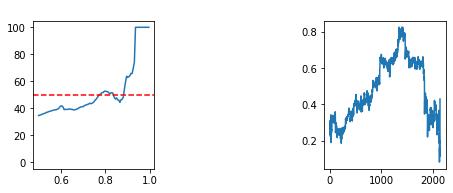


Pred by Real
64/64 [==============================] - 0s 1ms/step
Pred by None Real
64/64 [==============================] - 0s 1ms/step


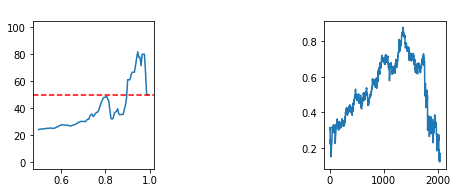

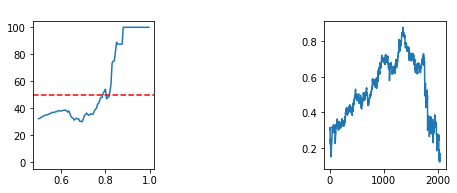


Pred by Real
66/66 [==============================] - 0s 2ms/step
Pred by None Real
66/66 [==============================] - 0s 1ms/step


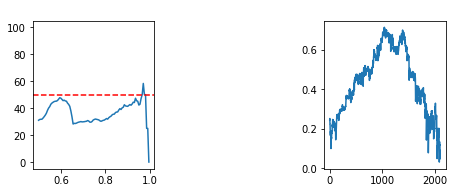

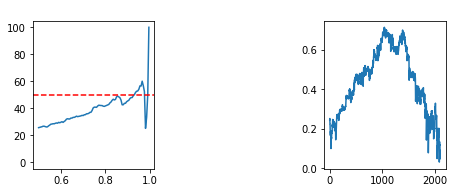


Error occured :  [Errno 2] No such file or directory: '/content/gdrive/My Drive/Colab Notebooks/Project_Stock/Made_X/Made_X 30_376.npy'

Error occured :  [Errno 2] No such file or directory: '/content/gdrive/My Drive/Colab Notebooks/Project_Stock/Made_X/Made_X 30_377.npy'

Error occured :  [Errno 2] No such file or directory: '/content/gdrive/My Drive/Colab Notebooks/Project_Stock/Made_X/Made_X 30_378.npy'

Error occured :  [Errno 2] No such file or directory: '/content/gdrive/My Drive/Colab Notebooks/Project_Stock/Made_X/Made_X 30_379.npy'

Error occured :  [Errno 2] No such file or directory: '/content/gdrive/My Drive/Colab Notebooks/Project_Stock/Made_X/Made_X 30_380.npy'

Pred by Real
Error occured :  SavedModel file does not exist at: /content/gdrive/My Drive/Colab Notebooks/Project_Stock/model/rapid_ascending 30_258_futures_rnn.hdf5/{saved_model.pbtxt|saved_model.pb}

Error occured :  [Errno 2] No such file or directory: '/content/gdrive/My Drive/Colab Notebooks/Project_Stock/Ma

In [ ]:
#     Confidence value should be adjusted by min max scale in y_pred    #
from keras.models import load_model
import matplotlib.pyplot as plt

for model_num in model_range:

  try:

    #     Get Test Dataset   #
    Made_X_ = np.load(gdrive_path + 'Made_X/Made_X %s_%s.npy' % (input_data_length, model_num + 41 * 3))
    Made_Y = np.load(gdrive_path + 'Made_X/Made_Y %s_%s.npy' % (input_data_length, model_num + 41 * 3)).reshape(-1, 1)

    #       dataset 분리      #
    # dataX 구성 : VOLUME, MA, CMO, OBV, RSI, MACD, MACD_SIGNAL, MACD_OSC 
    # dataX 구성 : VOLUME, EMA1, EMA2, CMO, OBV, RSI, MACD, MACD_SIGNAL, MACD_OSC 
    # Made_X = Made_X_[:, :, [-4]]
    Made_X = Made_X_[:, :, :4]
    # print(Made_X.shape)
    # print(Made_Y.shape)
    # break

    row = Made_X.shape[1]
    col = Made_X.shape[2]

    # X_train, X_val, Y_train, Y_val = train_test_split(Made_X, Made_Y, test_size=0.3,
    #                                                   shuffle=False)

    # X_train = X_train.astype('float32')#.reshape(-1, input_data_length, col, 1)
    # X_val = X_val.astype('float32')#.reshape(-1, input_data_length, col, 1)

    X_test = Made_X.astype('float32')
    Y_test = Made_Y
    
    for model_i, model_num in enumerate([model_num, model_num + 41]):

      if model_i == 0:
        print('Pred by Real')
      else:
        print('Pred by None Real')

      model_path = gdrive_path + "model/rapid_ascending %s_%s_futures_rnn.hdf5" % (input_data_length, model_num)
      model = load_model(model_path)
      y_pred_ = model.predict(X_test, verbose=1)
      # total_y_pred_ = model.predict(Made_X, verbose=1)

      plt.figure(figsize=(10, 6))
      
      for index, y_pred_ in enumerate([y_pred_]):

        # print('len(y_pred_) :', len(y_pred_))
        target_column = y_pred_[:, [-1]]
        # column_min, column_max = train_y_pred_.min(),train_y_pred_.max()
        column_min, column_max = target_column.min(),target_column.max()
        # print(column_min, column_max)

        x_ticks = np.arange(0.5, 1, 0.005)
        # x_ticks = np.arange(0.5, column_max, 0.005) <-- column_max 대응할만한 값을 찾아야한다. 1 까지는 사용못할것
        confidence_result = list()
        for confidence in x_ticks:
          # confidence = 0.9

          # if column_max < 0.5:
          #   break
          # else:
          #   scaled_confidence = .5 + (column_max - .5) * confidence
          scaled_confidence = column_min + (column_max - column_min) * confidence

          # scaled_confidence = confidence
          # print(scaled_confidence)
          # print('confidence :', confidence)

          y_pred = np.where(target_column >= scaled_confidence, 1, 0).reshape(-1, )

          #   inverse version   #
          # confidence = 1 - confidence
          # scaled_confidence = y_pred_[:, [-1]].min() + (y_pred_[:, [-1]].max() - y_pred_[:, [-1]].min()) * confidence
          # y_pred = np.where(y_pred_[:, [-1]] <= scaled_confidence, 1, 0).reshape(-1, )

          #     결국, Categorical 은 index 값으로 value 를 나타내는 것    #
          # t_te = np.argmax(Y_val, axis=1)

          t_te = Y_test

          # print(y_pred_[:5])
          # print(Y_val[:5])
          # break

          pred_true = 0
          real_true = 0

          #       predict value 존나 높으면 True 일 확률 존나 높은건데, 그게 진짜 True가 맞냐 이걸 알고 싶은거지     #
          #       confidence를 만족하는 label이 1인 데이터 안에서 pred 1 / label 1 -> 이걸 도출해면 된다        #

          for i in range(len(y_pred)):
            if y_pred[i] == 1:  
              pred_true += 1
              if t_te[i] == y_pred[i]:
                real_true += 1

          true_true = real_true / pred_true * 100
          confidence_result.append(true_true)
          # print('True Pred / Total True : %s / %s' % (real_true, pred_true))
          # print('Accuracy : %2.f %%' % (true_true))
          # print()

        # if column_max < 0.5:
        #   continue
        
        plt.subplot(2, 4, index + 1 + model_i * 4)
        plt.plot(x_ticks, confidence_result)
        plt.axhline(50, linestyle='--', color='red')
        plt.ylim(-5, 105)
        plt.title('%s %s' % ((column_min, column_max)), color='white', fontsize=10)

        if index == 0:
          plt.subplot(2, 4, index + 3 + model_i * 4)
          plt.plot(Made_X_[:, [-1], [3]])
        elif index == 1:
          plt.subplot(2, 4, index + 3 + model_i * 4)
          plt.plot(Made_X_[:, [-1], [3]])

    plt.show()

  except Exception as e:
    print('Error occured : ', e)
  print()


### ***Check Entry points in Chart***

confidence : 0.8


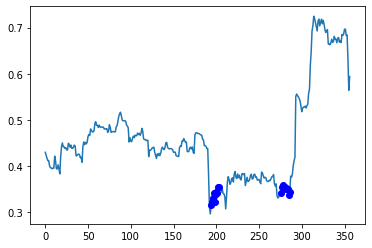

In [ ]:
#     Confidence value should be adjusted by min max scale in y_pred    #
from keras.models import load_model


confidence = 0.8
scaled_confidence = column_min + (column_max - column_min) * confidence
# print(scaled_confidence)
print('confidence :', confidence)

y_pred = np.where(target_column >= scaled_confidence, 1, 0).reshape(-1, )
t_te = np.argmax(Y_val, axis=1)

close = Made_X_[-len(X_val):, [-1], [3]]
plt.plot(close)
# plt.show()

long_marker_x = list()
long_marker_y = list()
for i in range(len(y_pred)):
  if y_pred[i] == 1:  
    if t_te[i] == y_pred[i]:
      long_marker_x.append(i)
      long_marker_y.append(close[i])
      

plt.plot(long_marker_x, long_marker_y, 'o', color='blue')
plt.show()